# Stock Predictor

This project uses 30 years worth of data on the SP500 to predict whether the price will go up or down.

## Data Import and Feature Generation

In [3]:
import pandas as pd
import yfinance as yf # used to get daily stock and index prices from yahoo finance

In [4]:
sp500=yf.Ticker("^GSPC") # ticker class let's you download price history for a single symbol

In [5]:
sp500 = sp500.history(period="max") # history method querries prices for a given range

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,0.0,0.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0


Returns a pd df where each row is price on trading days, with:
Open, Close - price at day opening/closing
High, Low - highest and lowest prices
Volume - total shares traded
Will not use dividends and stock splits

In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-08 00:00:00-05:00', '2023-12-11 00:00:00-05:00',
               '2023-12-12 00:00:00-05:00', '2023-12-13 00:00:00-05:00',
               '2023-12-14 00:00:00-05:00', '2023-12-15 00:00:00-05:00',
               '2023-12-18 00:00:00-05:00', '2023-12-19 00:00:00-05:00',
               '2023-12-20 00:00:00-05:00', '2023-12-21 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24110, freq=None)

<Axes: xlabel='Date'>

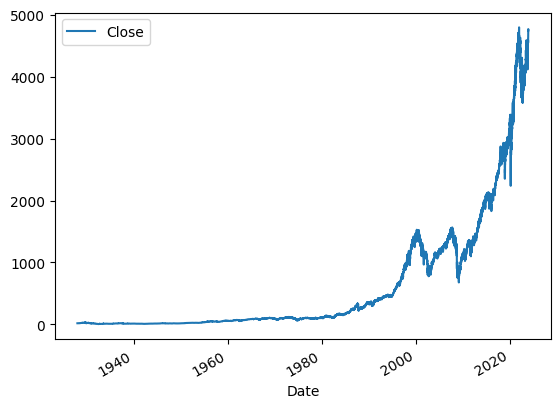

In [8]:
sp500.plot.line(y="Close", use_index=True)

Should have bought early!

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
#useful to know whether SP500 will go up or down to know when to buy/sell

sp500["Tomorrow"] = sp500["Close"].shift(-1) # shifting closing price as estimate for tomorrow

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098


In [12]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # new col to check if price goes up or down as int bool
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0


In [13]:
relevant_sp500 = sp500.loc["1990-01-01 00:00:00-05:00":].copy() # only including last 30 years of data for relevancy

In [14]:
relevant_sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0


## Machine Learning

Building a model (random forest)

In [15]:
from sklearn.ensemble import RandomForestClassifier # using to avoid overfitting and pick up non-linear trends

In [16]:
# set model as RF with 100 decision trees
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

In [17]:
# as time-series data, cannot do k-fold cross-validation (otherwise would cause data leakage) so just split sequentially
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]


# choose features
predictors = ["Close", "Volume", "Open", "High", "Low"]

# train model on features and the target output
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [18]:
# generate predictions using model
preds = model.predict(test[predictors])

In [19]:
# convert predictions in series data type
preds = pd.Series(preds, index=test.index, name="Predictions")
preds

Date
2023-08-02 00:00:00-04:00    1
2023-08-03 00:00:00-04:00    1
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
                            ..
2023-12-15 00:00:00-05:00    0
2023-12-18 00:00:00-05:00    0
2023-12-19 00:00:00-05:00    0
2023-12-20 00:00:00-05:00    0
2023-12-21 00:00:00-05:00    0
Name: Predictions, Length: 100, dtype: int32

In [20]:
from sklearn.metrics import precision_score

In [21]:
#check precision of predicted vs actual target value
precision_score(test["Target"], preds)

0.5454545454545454

In [22]:
combined = pd.concat([test["Target"], preds], axis=1) # add results onto pd df

<Axes: xlabel='Date'>

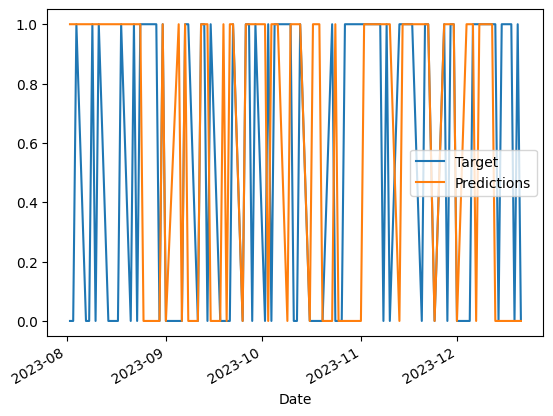

In [23]:
combined.plot()

## Backtesting

In [24]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) # train the model on training data
    preds = model.predict(test[predictors]) # generate predictions
    preds = pd.Series(preds, index=test.index, name="Predictions") # convert to pd series datatype
    combnied = pd.concat([test["Target"], preds], axis=1) # make a df with predictions and actual values of target
    return combined
    

In [25]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [26]:
predictions = backtest(sp500, model, predictors)

In [27]:
predictions["Predictions"].value_counts()

Predictions
1    5742
0    2958
Name: count, dtype: int64

In [28]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5454545454545454

In [29]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.54
0    0.46
Name: count, dtype: float64

## Improvements

In [30]:
horizons = [2,5,60,250,1000] # last n days to look at
new_predictors = []

for horizon in horizons:
    rolling_avg = sp500.rolling(horizon).mean()
    
    ratio_col = f"Close_ratio_{horizon}"
    sp500[ratio_col] = sp500["Close"] / rolling_avg["Close"] # comparing closing val to avg over last n days
    
    trend_col = f"Trend_{horizon}"
    sp500[trend_col] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_col, trend_col]

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0,1.002823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0,0.998873,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1,0.995180,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0,1.003124,1.0,0.999434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.203954,529.0


In [32]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1931-12-29 00:00:00-05:00,7.960000,7.960000,7.960000,7.960000,0,8.100000,1,1.012723,1.0,0.996994,3.0,0.821282,24.0,0.582074,105.0,0.394305,521.0
1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.593657,105.0,0.401432,521.0
1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.596489,105.0,0.402615,522.0
1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.556754,104.0,0.375034,522.0
1932-01-05 00:00:00-05:00,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.557255,104.0,0.374726,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14 00:00:00-05:00,4721.040039,4738.569824,4694.339844,4719.549805,6314040000,4719.189941,0,1.001322,2.0,1.012903,5.0,1.073133,36.0,1.111284,134.0,1.192991,529.0
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.192454,528.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.197400,528.0


In [33]:
# increasing estimators for better results
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=42)

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) # train the model on training data
    preds = model.predict_proba(test[predictors])[:,1] # generate predictions probabilities instead
    
    # changing threshold to only trade when more confident
    
    preds[preds>= 0.6] = 1
    preds[preds < 0.6] = 0
    
    preds = pd.Series(preds, index=test.index, name="Predictions") # convert to pd series datatype
    combnied = pd.concat([test["Target"], preds], axis=1) # make a df with predictions and actual values of target
    return combined

In [35]:
predictions = backtest(sp500, model, new_predictors)

In [36]:
predictions["Predictions"].value_counts()

Predictions
1    5478
0    2822
Name: count, dtype: int64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5454545454545454